In [62]:
# dependencies

from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



Reading Data from csv

    ID: Unique identifier for each patient.
    
    age: Age of the patient in days.
    
    age_years: Age of the patient in years (derived from age).
    
    gender: Gender of the patient. Categorical variable (1: Female, 2: Male).
    
    height: Height of the patient in centimeters.
    
    weight: Weight of the patient in kilograms.
    
    ap_hi: Systolic blood pressure.
    
    ap_lo: Diastolic blood pressure.
    
    cholesterol: Cholesterol levels. Categorical variable (1: Normal, 2: Above Normal, 3: Well Above Normal).
    
    gluc: Glucose levels. Categorical variable (1: Normal, 2: Above Normal, 3: Well Above Normal).
    
    smoke: Smoking status. Binary variable (0: Non-smoker, 1: Smoker).
    
    alco: Alcohol intake. Binary variable (0: Does not consume alcohol, 1: Consumes alcohol).
    
    active: Physical activity. Binary variable (0: Not physically active, 1: Physically active).
    
    cardio: Presence or absence of cardiovascular disease. Target variable. Binary (0: Absence, 1: Presence).
    
    bmi: Body Mass Index, derived from weight and height. Calculated as ( \text{BMI} = \frac{\text{weight (kg)}}{\text{height (m)}^2} ).
    
    bp_category: Blood pressure category based on ap_hi and ap_lo. Categories include "Normal", "Elevated", "Hypertension Stage 1", "Hypertension Stage 2", and "Hypertensive Crisis".
    
    bp_category_encoded: Encoded form of bp_category for machine learning purposes.

In [63]:
data = pd.read_csv('cardio_data_processed.csv')
df = data.copy()
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal


Data preprocessing

In [64]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'age_years',
       'bmi', 'bp_category', 'bp_category_encoded'],
      dtype='object')

In [65]:
df.shape

(68205, 17)

In [66]:
cols_to_remove = ['id','age','bp_category_encoded']
df.drop(cols_to_remove,axis=1,inplace=True)
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal


In [67]:
df.isnull().sum()

gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
age_years      0
bmi            0
bp_category    0
dtype: int64

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68205 entries, 0 to 68204
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       68205 non-null  int64  
 1   height       68205 non-null  int64  
 2   weight       68205 non-null  float64
 3   ap_hi        68205 non-null  int64  
 4   ap_lo        68205 non-null  int64  
 5   cholesterol  68205 non-null  int64  
 6   gluc         68205 non-null  int64  
 7   smoke        68205 non-null  int64  
 8   alco         68205 non-null  int64  
 9   active       68205 non-null  int64  
 10  cardio       68205 non-null  int64  
 11  age_years    68205 non-null  int64  
 12  bmi          68205 non-null  float64
 13  bp_category  68205 non-null  object 
dtypes: float64(2), int64(11), object(1)
memory usage: 7.3+ MB


In [69]:
df.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
count,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000
mean,1.348625,164.372861,74.100688,126.434924,81.263925,1.363243,1.225174,0.087662,0.053134,0.803548,0.493688,52.823635,27.510513
std,0.476539,8.176756,14.288862,15.961685,9.143985,0.678080,0.571288,0.282805,0.224302,0.397317,0.499964,6.769909,6.026497
min,1.000000,55.000000,11.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000,3.471784
25%,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875115
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000,26.346494
75%,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,30.116213
max,2.000000,250.000000,200.000000,180.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000,298.666667


<Axes: xlabel='cardio', ylabel='count'>

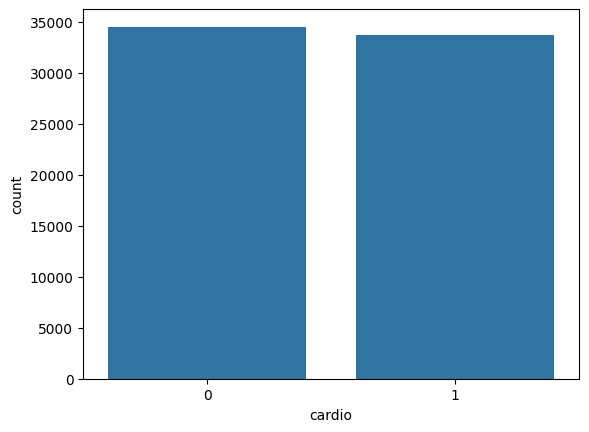

In [70]:
sns.countplot(data=df,x='cardio')

In [71]:
df['cardio'].value_counts()

cardio
0    34533
1    33672
Name: count, dtype: int64

Correlations

In [72]:
df.columns

Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'cardio', 'age_years', 'bmi', 'bp_category'],
      dtype='object')

In [73]:
categorical = ['gender','cholesterol', 'gluc',
                'smoke', 'alco', 'active', 'cardio','bp_category']

numerical = [col for col in df.columns if col not in categorical]

numerical

['height', 'weight', 'ap_hi', 'ap_lo', 'age_years', 'bmi']

In [74]:
corr = df[numerical].corr()

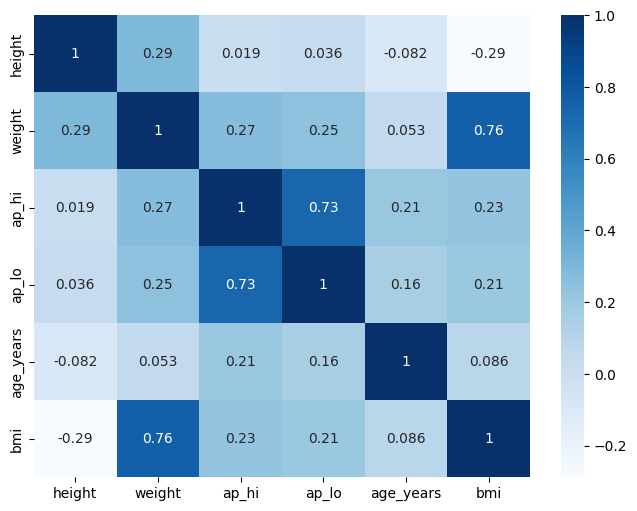

In [75]:
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True,cmap='Blues')

plt.savefig('correaltion-heatmap.jpg')

Columns Distribution and Outliers

In [76]:
numerical

['height', 'weight', 'ap_hi', 'ap_lo', 'age_years', 'bmi']

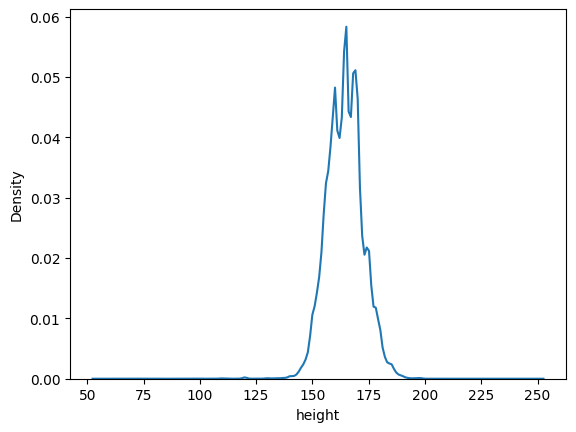

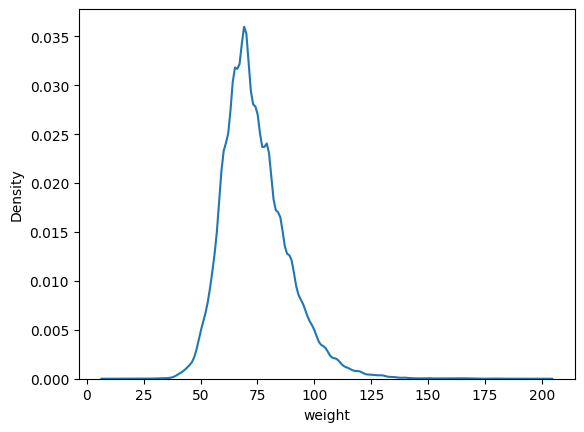

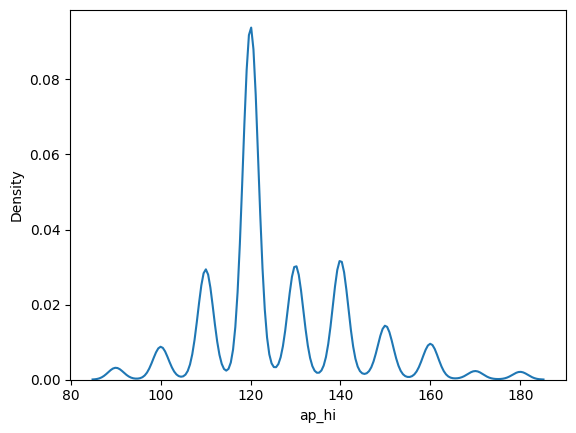

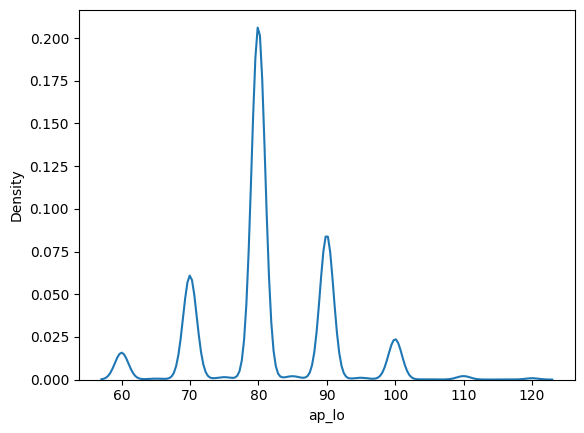

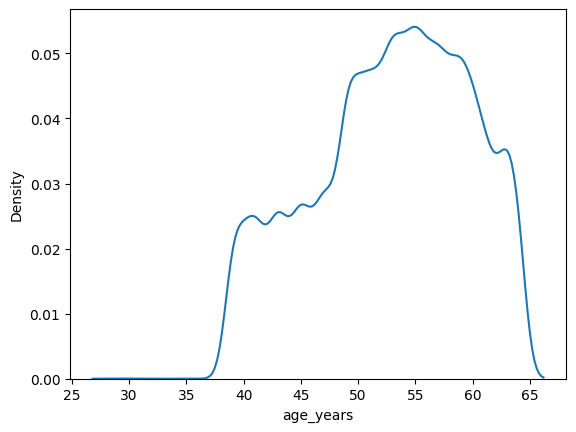

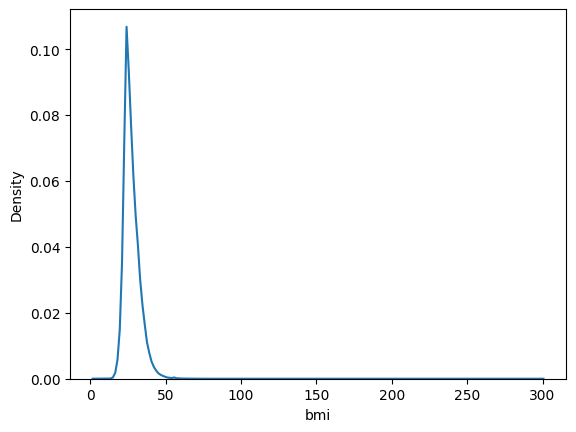

In [77]:
for col in numerical:
    plt.figure()
    sns.kdeplot(df[col])

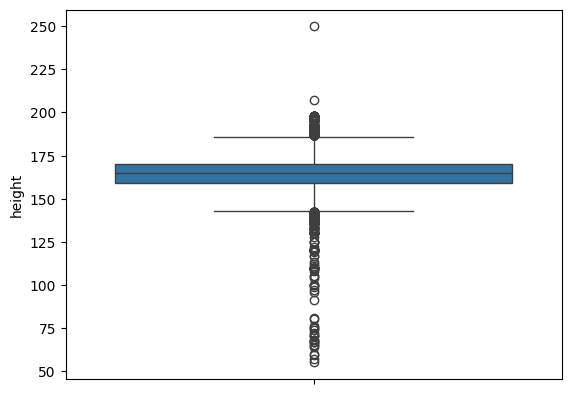

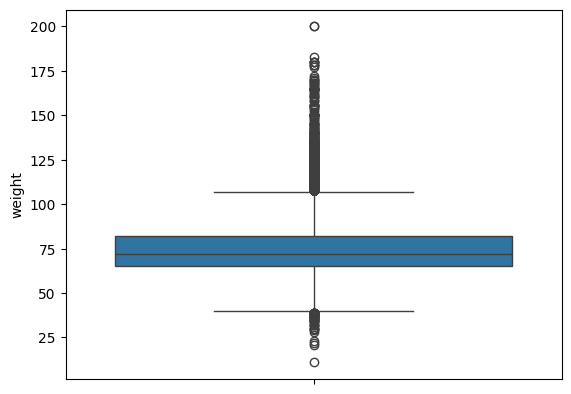

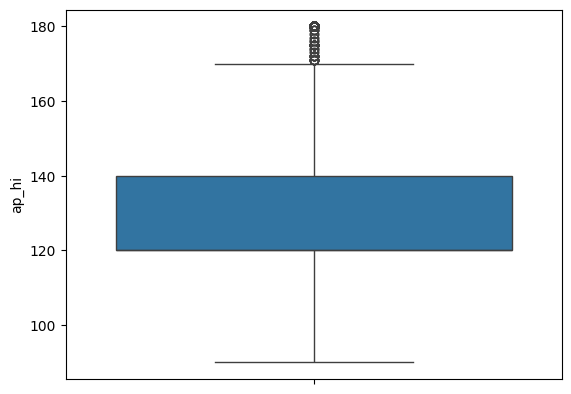

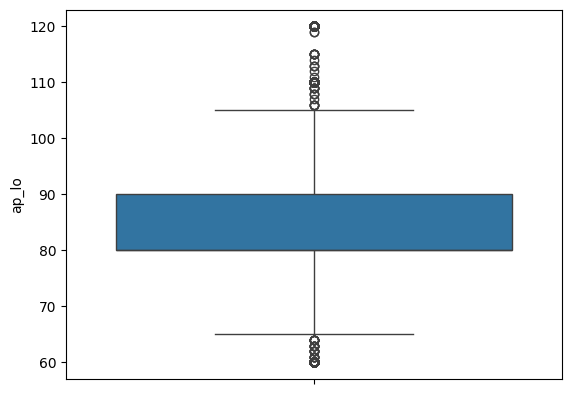

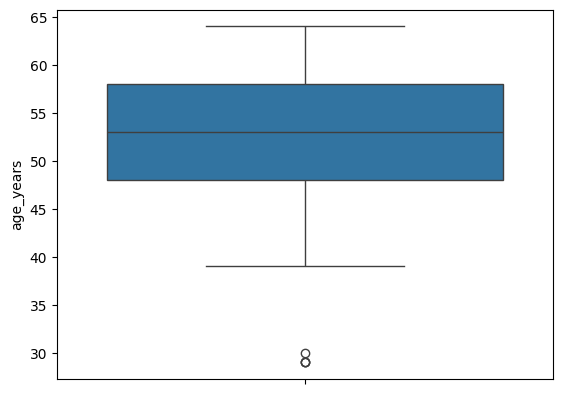

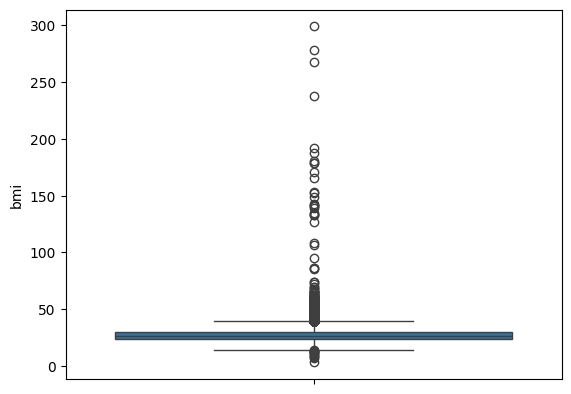

In [78]:
for col in numerical:
    plt.figure()
    sns.boxplot(df[col])

Height Column

<Axes: ylabel='height'>

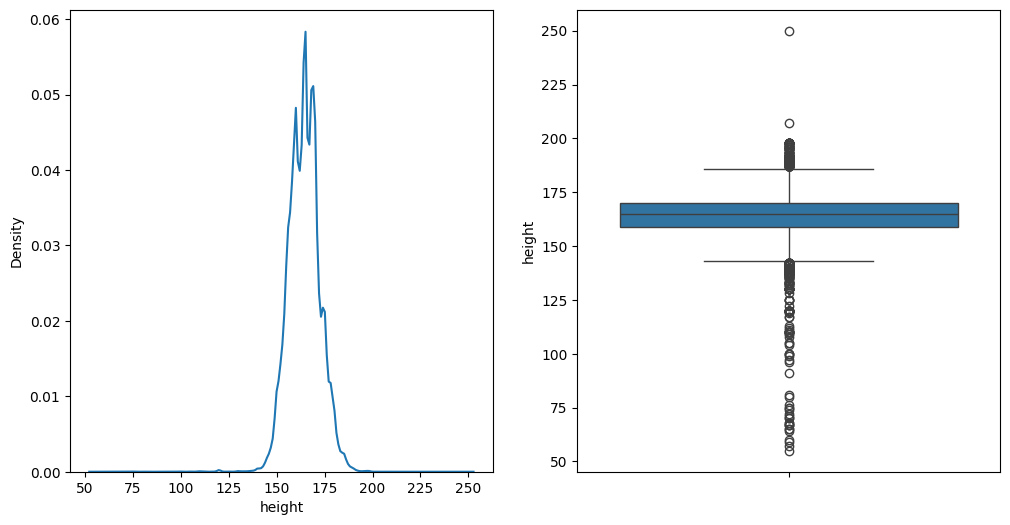

In [79]:
fig,axs = plt.subplots(1,2)
fig.set_figheight(6)
fig.set_figwidth(12)
sns.kdeplot(df['height'],ax=axs[0])
sns.boxplot(df['height'],ax=axs[1])

In [80]:
# IQR, Boundary Values, pciles, yeojohnson

df['height_log'] = np.log1p(df['height'])

<Axes: ylabel='height_log'>

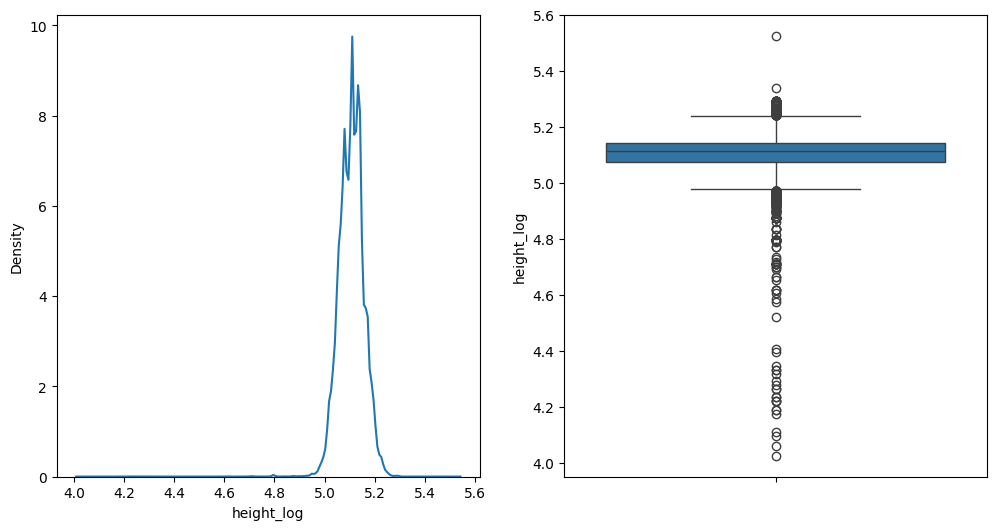

In [81]:
fig,axs = plt.subplots(1,2)
fig.set_figheight(6)
fig.set_figwidth(12)
sns.kdeplot(df['height_log'],ax=axs[0])
sns.boxplot(df['height_log'],ax=axs[1])

<Axes: ylabel='height_yj'>

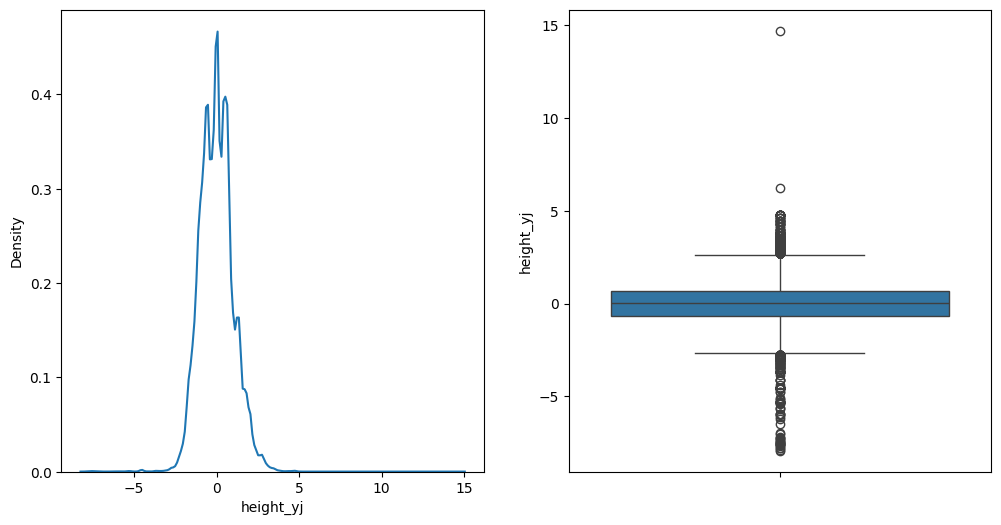

In [82]:
pt = PowerTransformer()

df['height_yj'] = pt.fit_transform(df['height'].values.reshape(-1,1))

fig,axs = plt.subplots(1,2)
fig.set_figheight(6)
fig.set_figwidth(12)
sns.kdeplot(df['height_yj'],ax=axs[0])
sns.boxplot(df['height_yj'],ax=axs[1])

In [83]:
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,height_log,height_yj
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,5.129899,0.421536
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,5.056246,-1.036468
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,5.111988,0.042828
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,5.135798,0.549899
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,5.056246,-1.036468


In [84]:
df.drop(df.columns[-2:],axis=1,inplace=True)

In [85]:
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal


Splitting the data

In [86]:
X = df.drop('cardio',axis=1)
y = df['cardio']

In [87]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75)

In [88]:
X_train.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,bmi,bp_category
3463,1,157,71.0,120,80,1,1,0,0,1,56,28.804414,Hypertension Stage 1
25670,1,162,64.0,180,120,2,1,0,0,0,57,24.386526,Hypertension Stage 2
61276,1,178,78.0,120,70,1,1,0,0,1,50,24.618104,Elevated
11078,2,159,79.0,140,90,1,2,1,0,1,59,31.248764,Hypertension Stage 2
19437,2,175,85.0,140,90,1,1,1,0,1,42,27.755102,Hypertension Stage 2


Scaling the numerical columns

In [89]:
numerical

['height', 'weight', 'ap_hi', 'ap_lo', 'age_years', 'bmi']

In [90]:
ct = ColumnTransformer(transformers=[('robsc',RobustScaler(),numerical),
                                     ('ohe',OneHotEncoder(drop='first',handle_unknown='ignore'),['bp_category'])],
                        remainder='passthrough')

In [91]:
X_train_transformerd = ct.fit_transform(X_train)

In [92]:
X_train_transformerd

array([[-0.72727273, -0.05882353,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.27272727, -0.47058824,  3.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18181818,  0.35294118,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-1.18181818,  1.64705882,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.63636364,  0.76470588,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  1.70588235, -0.5       , ...,  0.        ,
         0.        ,  1.        ]])

In [93]:
ct.get_feature_names_out()

array(['robsc__height', 'robsc__weight', 'robsc__ap_hi', 'robsc__ap_lo',
       'robsc__age_years', 'robsc__bmi',
       'ohe__bp_category_Hypertension Stage 1',
       'ohe__bp_category_Hypertension Stage 2', 'ohe__bp_category_Normal',
       'remainder__gender', 'remainder__cholesterol', 'remainder__gluc',
       'remainder__smoke', 'remainder__alco', 'remainder__active'],
      dtype=object)

In [94]:
pd.DataFrame(data=X_train_transformerd,columns=ct.get_feature_names_out())

,robsc__height,robsc__weight,robsc__ap_hi,robsc__ap_lo,robsc__age_years,robsc__bmi,ohe__bp_category_Hypertension Stage 1,ohe__bp_category_Hypertension Stage 2,ohe__bp_category_Normal,remainder__gender,remainder__cholesterol,remainder__gluc,remainder__smoke,remainder__alco,remainder__active
0,-0.727273,-0.058824,0.0,0.0,0.3,0.393828,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
1,-0.272727,-0.470588,3.0,4.0,0.4,-0.314042,0.0,1.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0
2,1.181818,0.352941,0.0,-1.0,-0.3,-0.276937,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
3,-0.545455,0.411765,1.0,1.0,0.6,0.785482,0.0,1.0,0.0,2.0,1.0,2.0,1.0,0.0,1.0
4,0.909091,0.764706,1.0,1.0,-1.1,0.225699,0.0,1.0,0.0,2.0,1.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51148,-0.727273,0.235294,0.0,0.0,-0.9,0.718848,1.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,1.0
51149,-0.454545,-0.705882,0.5,0.0,0.1,-0.466103,1.0,0.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0
51150,-1.181818,1.647059,1.0,2.0,0.1,2.713634,0.0,1.0,0.0,1.0,2.0,2.0,0.0,0.0,1.0
51151,0.636364,0.764706,0.0,0.0,0.8,0.382185,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0


In [95]:
X_test_transformerd = ct.transform(X_test)

In [96]:
# X_test_transformerd
X_train_transformerd.shape

(51153, 15)

In [97]:
ct.get_feature_names_out()

array(['robsc__height', 'robsc__weight', 'robsc__ap_hi', 'robsc__ap_lo',
       'robsc__age_years', 'robsc__bmi',
       'ohe__bp_category_Hypertension Stage 1',
       'ohe__bp_category_Hypertension Stage 2', 'ohe__bp_category_Normal',
       'remainder__gender', 'remainder__cholesterol', 'remainder__gluc',
       'remainder__smoke', 'remainder__alco', 'remainder__active'],
      dtype=object)

In [98]:
# X_train.columns >> ColumnTransformer >> Prediciton

Training The Model

* Decision Tree Classifier
* RandomForest
* Xgboost

In [99]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

Decision Tree

In [100]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train_transformerd,y_train)
pred = dtc.predict(X_test_transformerd)

In [101]:
pred

array([0, 1, 0, ..., 0, 0, 1], dtype=int64)

In [102]:
accuracy = accuracy_score(y_test,pred)
recall = recall_score(y_test,pred)

cm = confusion_matrix(y_test,pred)

In [103]:
print(accuracy)
print(recall)

0.6317147548674642
0.6102879171184195


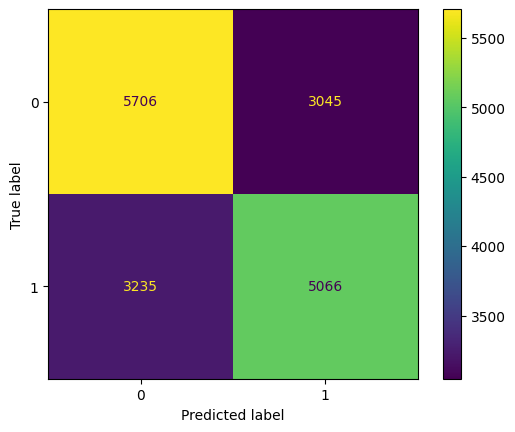

In [104]:
ConfusionMatrixDisplay(cm).plot()

In [105]:
dtc2 = DecisionTreeClassifier(max_depth=5,criterion='entropy')

dtc2.fit(X_train_transformerd,y_train)
pred = dtc2.predict(X_test_transformerd)

accuracy = accuracy_score(y_test,pred)
recall = recall_score(y_test,pred)

cm = confusion_matrix(y_test,pred)

In [106]:
print(accuracy)
print(recall)

0.7318789584799437
0.6726900373448982


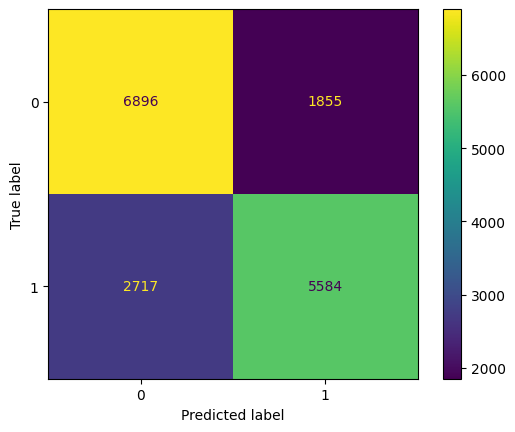

In [107]:

ConfusionMatrixDisplay(cm).plot()

HypertTuning Decision Tree

In [108]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [109]:
param_dict = {
                'criterion': ['gini','entropy'],
                'max_depth': [5,6,7],
                'max_features': [7,8,9,10,12,15],
                'min_samples_split': [8,10,12],
                }

randomcv = RandomizedSearchCV(dtc,param_distributions=param_dict)
randomcv.fit(X_train_transformerd,y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 6, 7],
                                        'max_features': [7, 8, 9, 10, 12, 15],
                                        'min_samples_split': [8, 10, 12]})

In [110]:
cv_pred = randomcv.predict(X_test_transformerd)

cv_acc = accuracy_score(cv_pred,y_test)
print(cv_acc)

0.7309992962702322


In [111]:
cv_pred = randomcv.predict(X_test_transformerd)

cv_rec = recall_score(cv_pred,y_test)
print(cv_rec)

0.734647460197119


In [112]:
randomcv.best_params_

{'min_samples_split': 12,
 'max_features': 10,
 'max_depth': 7,
 'criterion': 'entropy'}

In [113]:
best_dtc = randomcv.best_estimator_

In [114]:
best_dtc.fit(X_train_transformerd,y_train)
best_pred = best_dtc.predict(X_test_transformerd)
acc = accuracy_score(best_pred,y_test)
rec = recall_score(best_pred,y_test)
cm = confusion_matrix(best_pred,y_test)

0.7288881069669247
0.7217265493127563


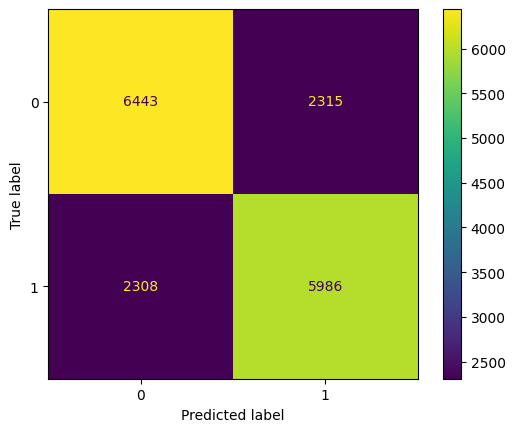

In [115]:
print(acc)
print(rec)
ConfusionMatrixDisplay(cm).plot()

In [116]:
best_dtc

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_features=10,
                       min_samples_split=12)

Prototyping for User Input for unseen data

In [117]:
# best_dtc.predict()

X_train_transformerd.shape

(51153, 15)

In [118]:
X_train.shape

(51153, 13)

In [119]:
X_train.columns

Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'age_years', 'bmi', 'bp_category'],
      dtype='object')

In [120]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal


In [121]:
X_train.columns

Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'age_years', 'bmi', 'bp_category'],
      dtype='object')

In [122]:
# gender = int(input('M/F').lower())
# height = int(input('heigh in cms'))
# weight = int(input('Weight in Kg'))
# ap_hi = int(input('Ap_hi'))
# ap_lo = int(input('ap_lo'))
# cholestrol = int(input('Cholestrol: Normal,Above Normal,Well Above Normal').lower())
# gluc = int(input('Gluc: Normal,Above Normal,Well Above Normal').lower())
# smoke = int(input('Smoker or Non-smoker').lower())
# alco = int(input('Alco: Yes/No').lower())
# active = int(input('Active: yes/no').lower())
# age = int(input('Age in years'))
# bmi = float(input('Bmi'))
# bp_cat = input('Bp Category: "Normal", "Elevated", "Hypertension Stage 1", "Hypertension Stage 2", and "Hypertensive Crisis"')



# # gender
# if gender=='m':
#     gen = 2
# else:
#     gen=1

# #cholestrol
# if cholestrol=='normal':
#     chol=1
# elif cholestrol=='above normal':
#     chol=2
# elif cholestrol=='well above normal':
#     chol=3



In [123]:
# userinput_num = [gender,height,weight,ap_hi,ap_lo,cholestrol,gluc,smoke,alco,active,age,bmi]
# userinput_cat = [bp_cat]

In [124]:
# arrayinputs_num = np.array(userinput_num).reshape(1,-1)
# arrayinputs_cat = np.array(userinput_cat).reshape(1,-1)

In [125]:
# ct = ColumnTransformer(transformers=[('robsc',RobustScaler(),arrayinputs_num),
#                                      ('ohe',OneHotEncoder(drop='first',handle_unknown='ignore'),arrayinputs_cat)],
#                         remainder='passthrough')

In [126]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

In [127]:
rfc.fit(X_train_transformerd,y_train)
pred = rfc.predict(X_test_transformerd)

accuracy = accuracy_score(y_test,pred)
recall = recall_score(y_test,pred)

cm = confusion_matrix(y_test,pred)

0.705723668777856
0.6994338031562463


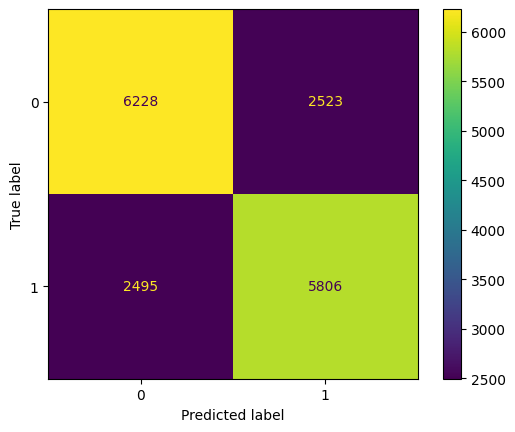

In [128]:
print(accuracy)
print(recall)
ConfusionMatrixDisplay(cm).plot()

In [129]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [130]:
params = {
        'criterion': ['gini','entropy'],
        'max_depth': [5,7,9,10,12,13],
        'min_samples_split': [5,7,8,10,12,15],
        'n_estimators': [50,100,120,150,170,200]}

In [131]:
randomised_cv = RandomizedSearchCV(param_distributions=params,estimator=rfc)

randomised_cv.fit(X_train_transformerd,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 7, 9, 10, 12, 13],
                                        'min_samples_split': [5, 7, 8, 10, 12,
                                                              15],
                                        'n_estimators': [50, 100, 120, 150, 170,
                                                         200]})

In [132]:
cv_pred = randomised_cv.predict(X_test_transformerd)

cv_acc = accuracy_score(cv_pred,y_test)
print(cv_acc)

0.7339315036359372


In [133]:
cv_pred = randomised_cv.predict(X_test_transformerd)

cv_rec = recall_score(cv_pred,y_test)
print(cv_rec)

0.7485472794506075


In [134]:
randomised_cv.best_params_

{'n_estimators': 150,
 'min_samples_split': 12,
 'max_depth': 13,
 'criterion': 'entropy'}

In [135]:
best_rfc = randomised_cv.best_estimator_

In [136]:
best_rfc.fit(X_train_transformerd,y_train)
best_pred = best_rfc.predict(X_test_transformerd)
acc = accuracy_score(best_pred,y_test)
rec = recall_score(best_pred,y_test)
cm = confusion_matrix(best_pred,y_test)

0.7349870982875909
0.7478374836173002


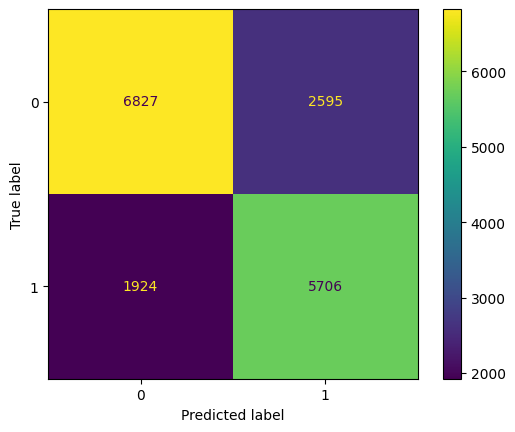

In [137]:
print(acc)
print(rec)
ConfusionMatrixDisplay(cm).plot()

In [139]:
best_rfc

RandomForestClassifier(criterion='entropy', max_depth=13, min_samples_split=12,
                       n_estimators=150)

In [140]:
from xgboost import XGBClassifier

In [141]:
xgb = XGBClassifier()
xgb.fit(X_train_transformerd,y_train)
pred = xgb.predict(X_test_transformerd)
acc = accuracy_score(pred,y_test)
rec = recall_score(pred,y_test)
cm = confusion_matrix(pred,y_test)

0.7317030260380014
0.7375669472073451


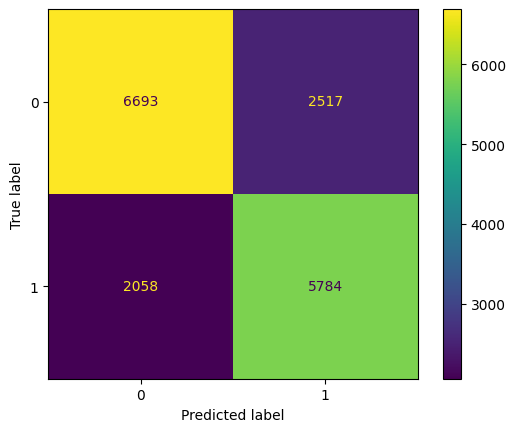

In [142]:
print(acc)
print(rec)
ConfusionMatrixDisplay(cm).plot()

In [144]:
xgb.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [147]:
params = {'objective': ['binary:logistic'],
 'gamma':[0.1,0.2,0.5,0.6],
 'learning_rate': [0.01,0.001,0.1],
 'max_depth': [5,7,9,10,12,13],
 'n_estimators': [50,80,100,110,120,150,160,170]}

In [148]:
randomised_cv = RandomizedSearchCV(param_distributions=params,estimator=xgb)

randomised_cv.fit(X_train_transformerd,y_train)

RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   param_distributions={'gamma': [0.1, 0.2, 0.5, 0.6],
                                        'learning_rate': [0.01, 0.001, 0.1],
                                        'max_depth': [5, 7, 9, 10, 12, 13],
                                        'n_estimators': [50, 80, 100, 110, 120,
                                                         150, 160, 170],
                                        'objective': ['binary:logistic']})

In [149]:
cv_pred = randomised_cv.predict(X_test_transformerd)

cv_acc = accuracy_score(cv_pred,y_test)
print(cv_acc)

cv_rec = recall_score(cv_pred,y_test)
print(cv_rec)

0.7348111658456487
0.752573185403021


In [150]:
randomised_cv.best_params_

{'objective': 'binary:logistic',
 'n_estimators': 160,
 'max_depth': 5,
 'learning_rate': 0.01,
 'gamma': 0.1}

In [154]:
best_xgb = randomised_cv.best_estimator_

In [155]:
best_xgb.fit(X_train_transformerd,y_train)
best_pred = best_xgb.predict(X_test_transformerd)
acc = accuracy_score(best_pred,y_test)
rec = recall_score(best_pred,y_test)
cm = confusion_matrix(best_pred,y_test)

0.7348111658456487
0.752573185403021


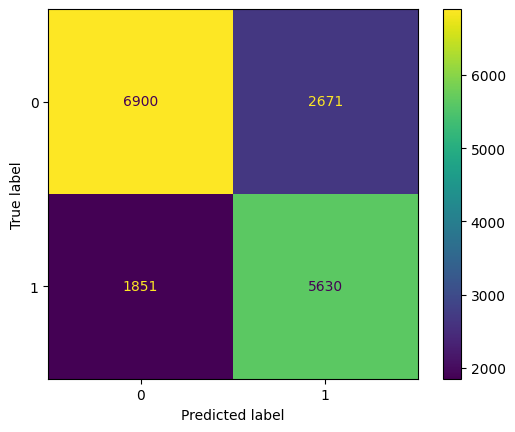

In [153]:
print(acc)
print(rec)
ConfusionMatrixDisplay(cm).plot()

In [156]:
best_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=160, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [157]:
import pickle
pickle.dump(best_xgb,open('xgb_classifier.pkl','wb'))